### Questions
* ax objects for subplots
* subplots/subplot what is the difference
* what point is there to use the figure
* dummying

### Objectives
YWBAT 
* build a box plot
* build histograms
* build and interpret violin plots
* add vlines and hlines to boost visualizations

### Outline
* questions
* load in some data or create data
* plotting everything

In [15]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = load_boston()

In [7]:
data = boston.data
columns = list(boston.feature_names) + ['target']
target = boston.target

In [9]:
df = pd.DataFrame(np.column_stack((data, target)), columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
age_types = []
for age in df.AGE:
    if age < 40:
        age_types.append('young')
    elif age < 80:
        age_types.append('medium')
    else:
        age_types.append('old')

In [103]:
df['age_types'] = age_types
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,age_types
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,medium
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,medium
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,medium


In [95]:
df.CHAS.unique()

array([0., 1.])

In [19]:
pprint(boston.DESCR)

('.. _boston_dataset:\n'
 '\n'
 'Boston house prices dataset\n'
 '---------------------------\n'
 '\n'
 '**Data Set Characteristics:**  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
 '(attribute 14) is usually the target.\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index of 

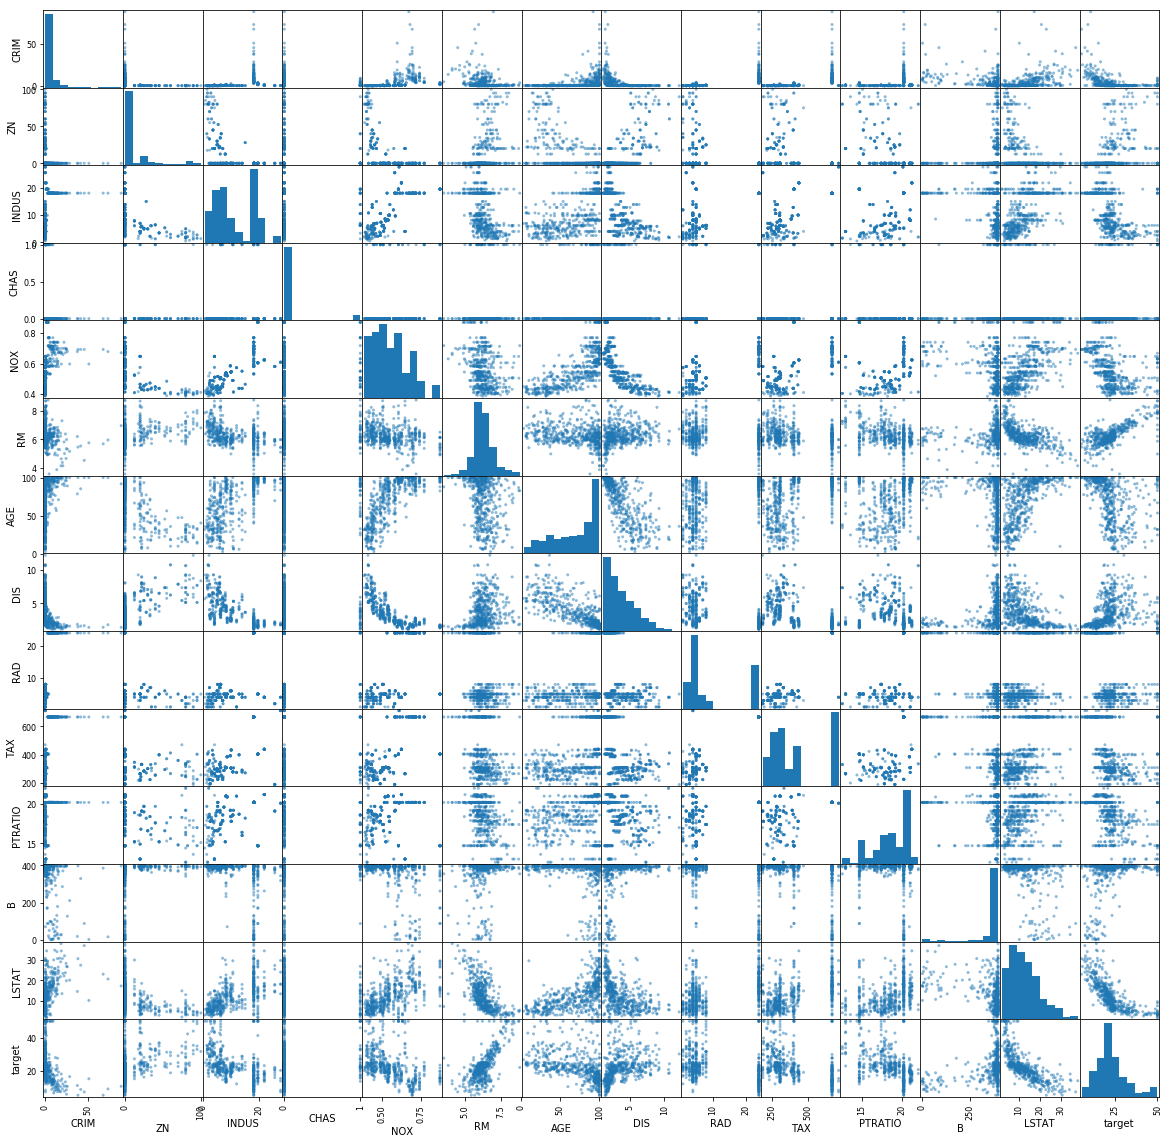

In [13]:
### Scatter Matrix
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

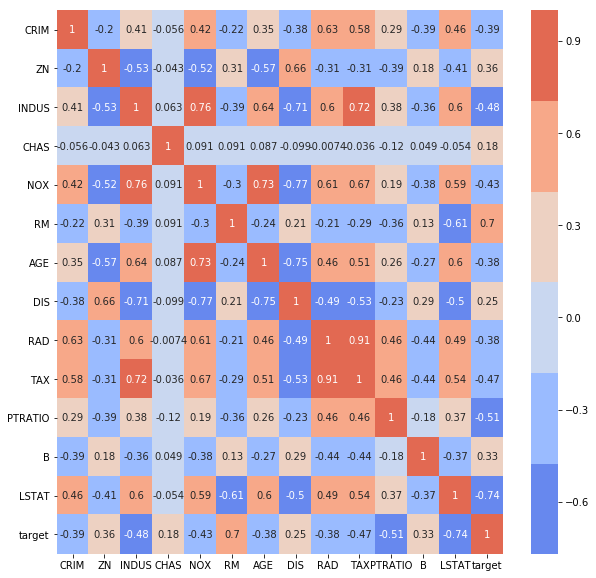

In [21]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette("coolwarm"))
plt.show()

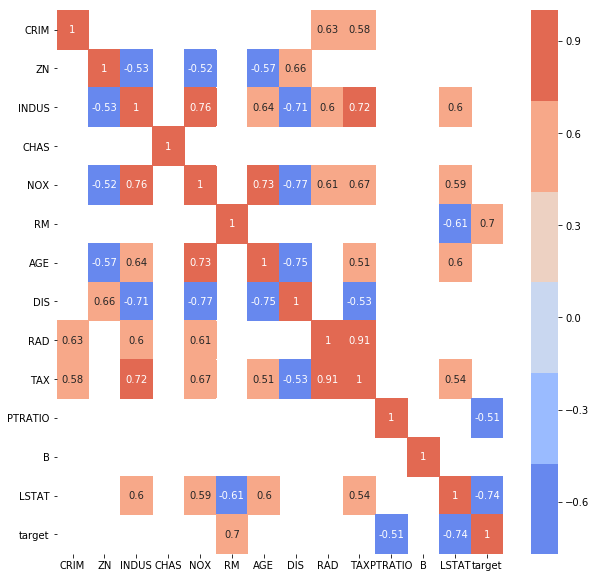

In [33]:
corr2 = corr[abs(corr) > .50]
plt.figure(figsize=(10, 10))
sns.heatmap(corr2, annot=True, fmt='0.2g', cmap=sns.color_palette("coolwarm"))
plt.show()

In [34]:
df.shape

(506, 14)

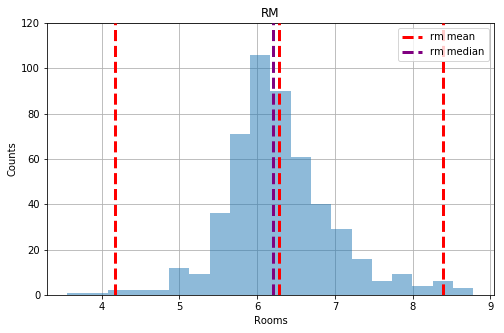

In [82]:
# plot 1 histogram
plt.figure(figsize=(8, 5))
plt.hist(df.RM, bins=20, zorder=2, alpha=0.5)
plt.vlines(x=df.RM.mean(), ymin=0, ymax=120, zorder=3, colors='r', linestyles='--', linewidth=3, label='rm mean')
plt.vlines(x=df.RM.mean() + 3*df.RM.std(), ymin=0, ymax=120, zorder=3, colors='r', linestyles='--', linewidth=3)
plt.vlines(x=df.RM.mean() - 3*df.RM.std(), ymin=0, ymax=120, zorder=3, colors='r', linestyles='--', linewidth=3)
plt.vlines(x=df.RM.median(), ymin=0, ymax=120, zorder=3, colors='purple', linestyles='--', linewidth=3, label='rm median')
plt.ylim([0, 120])
plt.xlabel("Rooms")
plt.ylabel("Counts")
plt.title('RM')
plt.legend()
plt.grid(zorder=0)
plt.show()

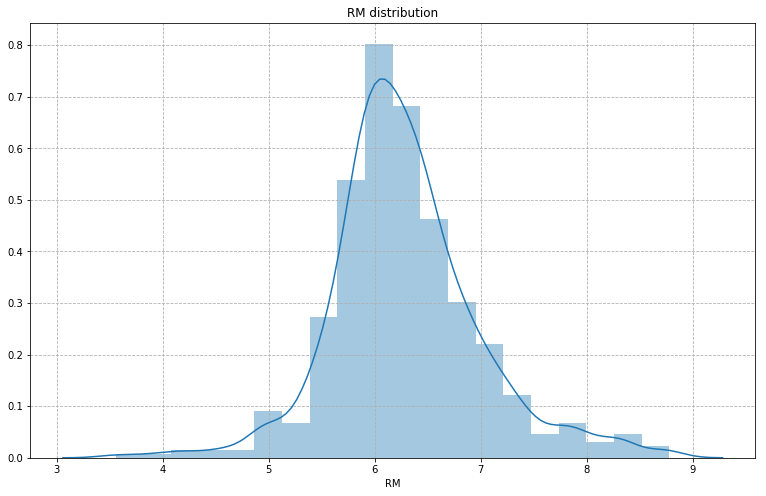

In [94]:
plt.figure(figsize=(13, 8))
plt.grid(linestyle='dashed')
plt.title("RM distribution")
sns.distplot(df.RM, bins=20)
plt.show()

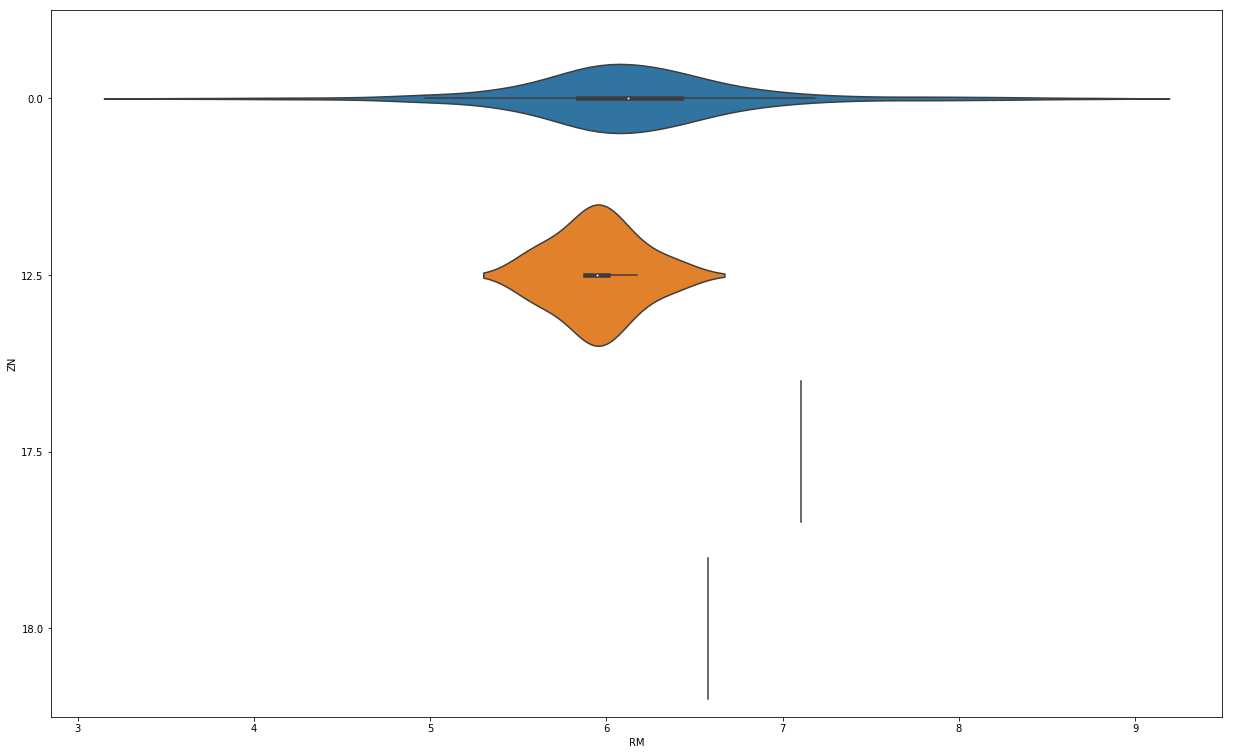

In [109]:
plt.figure(figsize=(21, 13))
sns.violinplot(x='RM', y='ZN', data=df[df.ZN<20], orient='h')

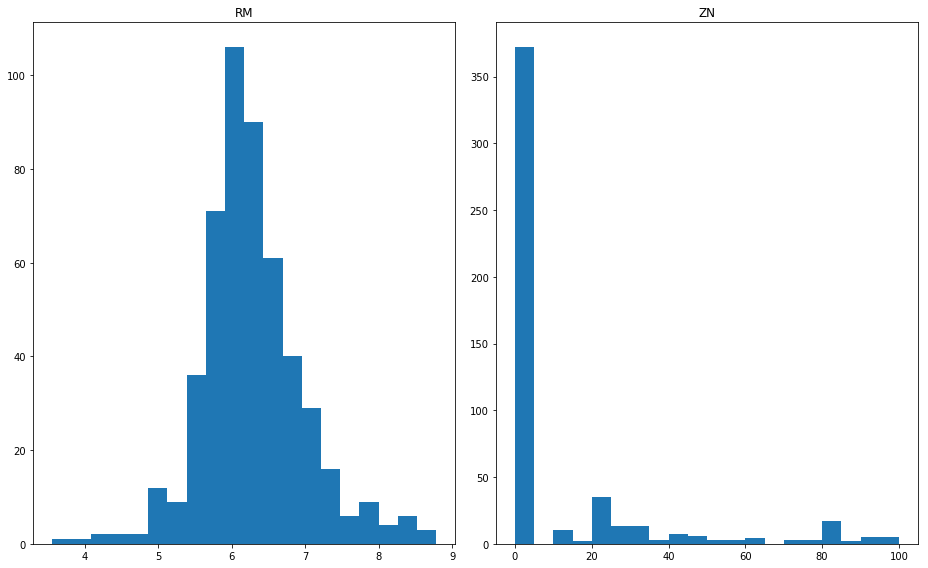

In [118]:
plt.subplots(nrows=1, ncols=2, figsize=(13, 8))

# subplot 1
plt.subplot(121)
plt.hist(df.RM, bins=20)
plt.title('RM')

# subplot 2
plt.subplot(122)
plt.hist(df.ZN, bins=20)
plt.title("ZN")

plt.tight_layout()
plt.show()

In [127]:
df.columns[0]

'CRIM'

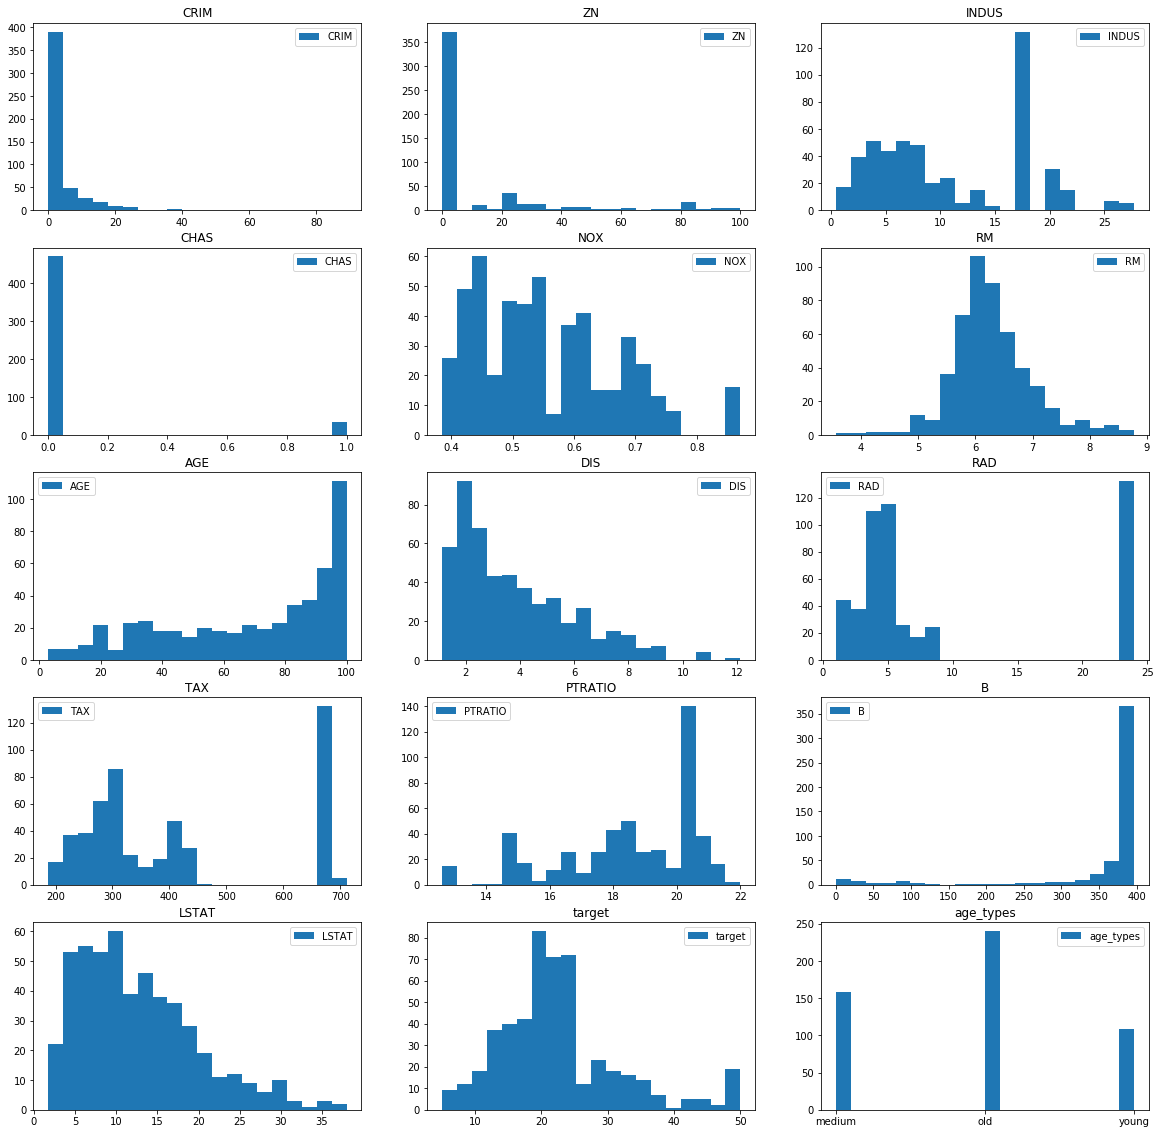

In [147]:
this, that = plt.subplots(5, 3, figsize=(20, 20))

for index, ax in enumerate(that.flatten()):
    column = df.columns[index]
    ax.hist(df[column], bins=20)
    ax.set_title(column)
    ax.legend()
plt.show()

### Assessment / What did we learn? 
* flatten method -> flattens matrices to 1d
* scatter matrices and heatmaps
* violin plots
* how to use universal attributes for plotting; plt.xlabel(), plt.ylims()
* kwargs -> meaning